<a href="https://colab.research.google.com/github/FarziBuilder/Embedding/blob/main/EmbeddingsTut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas openai transformers plotly matplotlib scikit-learn torch torchvision scipy tiktoken

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 69.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 61.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 80.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 76.2 MB/s eta 0:00:00


In [ ]:
!pip install tiktoken

In [ ]:
import openai

In [ ]:
# imports
import pandas as pd
import tiktoken

from openai.embeddings_utils import get_embedding

In [ ]:

# embedding model parameters
embedding_model = "text-embedding-ada-002"
embedding_encoding = "cl100k_base"  # this the encoding for text-embedding-ada-002
max_tokens = 8000  # the maximum for text-embedding-ada-002 is 8191

In [ ]:
df.shape

(0, 5)

In [ ]:
input_datapath = "/content/amazon.csv"  # to save space, we provide a pre-filtered dataset
df = pd.read_csv(input_datapath, index_col=0, nrows=50000)
df = df[["Time", "ProductId", "UserId", "Score", "Summary", "Text"]]
df = df.dropna()
df["combined"] = (
    "Title: " + df.Summary.str.strip() + "; Content: " + df.Text.str.strip()
)
df.head(2)

,Time,ProductId,UserId,Score,Summary,Text,combined
Id,,,,,,,
1,1303862400,B001E4KFG0,A3SGXH7AUHU8GW,5,Good Quality Dog Food,I have bought several of the Vitality canned d...,Title: Good Quality Dog Food; Content: I have ...
2,1346976000,B00813GRG4,A1D87F6ZCVE5NK,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Title: Not as Advertised; Content: Product arr...


In [ ]:
df

,Time,ProductId,UserId,Score,Summary,Text,combined
Id,,,,,,,
1,1303862400,B001E4KFG0,A3SGXH7AUHU8GW,5,Good Quality Dog Food,I have bought several of the Vitality canned d...,Title: Good Quality Dog Food; Content: I have ...
2,1346976000,B00813GRG4,A1D87F6ZCVE5NK,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Title: Not as Advertised; Content: Product arr...
3,1219017600,B000LQOCH0,ABXLMWJIXXAIN,4,"""Delight"" says it all",This is a confection that has been around a fe...,"Title: ""Delight"" says it all; Content: This is..."
4,1307923200,B000UA0QIQ,A395BORC6FGVXV,2,Cough Medicine,If you are looking for the secret ingredient i...,Title: Cough Medicine; Content: If you are loo...
5,1350777600,B006K2ZZ7K,A1UQRSCLF8GW1T,5,Great taffy,Great taffy at a great price. There was a wid...,Title: Great taffy; Content: Great taffy at a ...
...,...,...,...,...,...,...,...
49996,1261180800,B00430B73W,AKW867T7C6HF8,5,Grown to really like them,My sister introduced me to these. They have be...,Title: Grown to really like them; Content: My ...
49997,1258934400,B00430B73W,A2PEHNEDMHOYTW,5,Healthy Snack at a great price!,A friend recommended these bars and I fell in ...,Title: Healthy Snack at a great price!; Conten...
49998,1257379200,B00430B73W,A2QH2KF2IAB143,5,Raw Revolution Hazelnut Cashew,Fabulous! I take one to work with me every da...,Title: Raw Revolution Hazelnut Cashew; Content...


In [ ]:
# subsample to 1k most recent reviews and remove samples that are too long
top_n = 25000
df = df.sort_values("Time").tail(top_n * 2)  # first cut to first 2k entries, assuming less than half will be filtered out
df.drop("Time", axis=1, inplace=True)

encoding = tiktoken.get_encoding(embedding_encoding)

# omit reviews that are too long to embed
df["n_tokens"] = df.combined.apply(lambda x: len(encoding.encode(x)))
df = df[df.n_tokens <= max_tokens].tail(top_n)
len(df)

25000

In [ ]:
openai.api_key = ""

In [ ]:
df

,ProductId,UserId,Score,Summary,Text,combined,n_tokens,embedding
Id,,,,,,,,
23635,B000E1FXLG,A1ZKY8IR5TDNJY,5,Good pudding,I was very glad to see this product offered on...,Title: Good pudding; Content: I was very glad ...,81,"[-0.00485996063798666, -0.005872182082384825, ..."
34909,B002DLXXHG,A1C4UA1L4GZ70T,5,Best deal out there,If you enjoy a softer style jerky this one is ...,Title: Best deal out there; Content: If you en...,49,"[-0.012066518887877464, -0.010790380649268627,..."
5530,B006DO8R84,A1HRYC60VTMYC0,3,"Convenient, stick it in your desk drawer at wo...","It's got the typical Jif taste, which to me is...","Title: Convenient, stick it in your desk drawe...",130,"[-0.022842170670628548, -0.01045937929302454, ..."
41614,B000NIHZMU,A3P2ZNJZM94I6O,5,Mild taste and a nice fragrance...,This tea has a very mild taste and it has a ni...,Title: Mild taste and a nice fragrance...; Con...,58,"[0.006474081892520189, -0.010475424118340015, ..."
39129,B0012HAUTQ,A31KY83IQ3MEKY,3,Good price,Price is good however always received cans tha...,Title: Good price; Content: Price is good howe...,39,"[-0.0020107394084334373, -0.011256064288318157..."
...,...,...,...,...,...,...,...,...
15605,B000255OIG,AUINI96NMGXUI,5,Love this faucet,Love this faucet. My husband had installed th...,Title: Love this faucet; Content: Love this fa...,78,"[0.0075875199399888515, 0.008514591492712498, ..."
15604,B000255OIG,A3SSEJ8IEM4YGW,5,Dogs love it.,"This is the ""all gone"" treat after dinner. It...","Title: Dogs love it.; Content: This is the ""al...",60,"[-0.0018608620157465339, -0.008432723581790924..."
16426,B007TJGZ54,A29BJSTYH9W3JI,5,super coffee,Great coffee and so easy to brew. This coffee...,Title: super coffee; Content: Great coffee and...,46,"[0.004482530523091555, -0.0033062752336263657,..."


In [ ]:
df["embedding"] = df.combined.apply(lambda x: get_embedding(x, engine=embedding_model))
df.to_csv("fine_food_reviews_with_embeddings_25k.csv")

In [ ]:
df.to_csv("fine_food_reviews_with_embeddings_1k.csv")

Now we will train use these embeddings to predict the score

In [ ]:
import pandas as pd
import numpy as np
from ast import literal_eval

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

datafile_path = "fine_food_reviews_with_embeddings_1k.csv"

X_train, X_test, y_train, y_test = train_test_split(list(df.embedding.values), df.Score, test_size=0.2, random_state=42)

rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(X_train, y_train)
preds = rfr.predict(X_test)

mse = mean_squared_error(y_test, preds)
mae = mean_absolute_error(y_test, preds)

print(f"ada-002 embedding performance on 1k Amazon reviews: mse={mse:.2f}, mae={mae:.2f}")

ada-002 embedding performance on 1k Amazon reviews: mse=0.63, mae=0.53


In [ ]:
type(X_test[0])

list

In [ ]:
bmse = mean_squared_error(y_test, np.repeat(y_test.mean(), len(y_test)))
bmae = mean_absolute_error(y_test, np.repeat(y_test.mean(), len(y_test)))
print(
    f"Dummy mean prediction performance on Amazon reviews: mse={bmse:.2f}, mae={bmae:.2f}"
)

Dummy mean prediction performance on Amazon reviews: mse=1.73, mae=1.03


In [ ]:
#Testing with a sample
texts = ["This product is very good"]
res = openai.Embedding.create(input=texts, engine=embedding_model)
input_embd = res['data'][0]['embedding']

In [ ]:
prd = rfr.predict([input_embd])
prd

array([4.82])

In [ ]:
df.columns

Index(['ProductId', 'UserId', 'Score', 'Summary', 'Text', 'combined',
       'n_tokens', 'embedding'],
      dtype='object')

In [ ]:
type(df.embedding)

pandas.core.series.Series

In [ ]:
len(df['embedding'])

1000

In [ ]:
df['babbage_similarity'] = df.embedding.to_numpy()

In [ ]:
df.columns

Index(['ProductId', 'UserId', 'Score', 'Summary', 'Text', 'combined',
       'n_tokens', 'embedding', 'babbage_similarity'],
      dtype='object')

In [ ]:
len(df['babbage_similarity'])

25000

In [ ]:
df.groupby('UserId').babbage_similarity

In [ ]:
grouped = df.groupby('UserId')

for name, group in grouped:
    print(f"Group for UserId = {name}")
    print(group.columns)
    break

Group for UserId = A06364072LBY1F3ING9XN
Index(['ProductId', 'UserId', 'Score', 'Summary', 'Text', 'combined',
       'n_tokens', 'embedding', 'babbage_similarity'],
      dtype='object')


In [ ]:
user_embeddings = df.groupby('UserId')['babbage_similarity'].apply(lambda x: np.mean(np.stack(x), axis=0))
prod_embeddings = df.groupby('ProductId')['babbage_similarity'].apply(lambda x: np.mean(np.stack(x), axis=0))

In [ ]:
len(user_embeddings), len(prod_embeddings)

(21097, 4759)

In [ ]:
cosine_similarity(user_embeddings[0], prod_embeddings[0])

0.7572537806873493

In [ ]:
from openai.embeddings_utils import cosine_similarity

# evaluate embeddings as recommendations on X_test
def evaluate_single_match(row):
    user_id = row.UserId
    product_id = row.ProductId
    try:
        user_embedding = user_embeddings[user_id]
        product_embedding = prod_embeddings[product_id]
        similarity = cosine_similarity(user_embedding, product_embedding)
        return similarity
    except Exception as e:
        return np.nan

df['cosine_similarity'] = df.apply(evaluate_single_match, axis=1)
df['percentile_cosine_similarity'] = df.cosine_similarity.rank(pct=True)

In [ ]:
df['cosine_similarity'][200]

0.9306930293691508

Correlation between user & vector similarity percentile metric and review number of stars (score): 16.55%


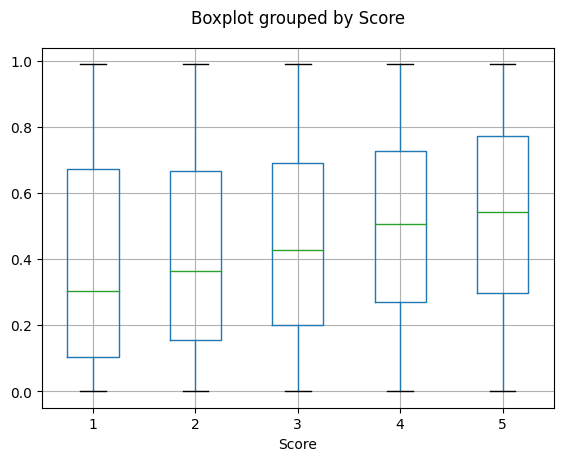

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm


correlation = df[['percentile_cosine_similarity', 'Score']].corr().values[0,1]
print('Correlation between user & vector similarity percentile metric and review number of stars (score): %.2f%%' % (100*correlation))

# boxplot of cosine similarity for each score
df.boxplot(column='percentile_cosine_similarity', by='Score')
plt.title('')
plt.show()
plt.close()

In [ ]:
#Do semantic search over the reviews
#Just create embeddings of the search, then do cosine similarity of it with each
#Then just select the top 3 and print

In [ ]:
type(df["embedding"])

pandas.core.series.Series

In [ ]:
def compare(string, n=5):
  embd1 = get_embedding(string, engine=embedding_model)
  df['similarity'] = df['embedding'].apply(lambda x: cosine_similarity(x, embd1))
  results = df.sort_values("similarity", ascending=False).head(n)
  joined_text = "\n".join(results["combined"])
  return joined_text

In [ ]:
input = "best cat food"
print(compare(input))

Title: Wonderful food - perfect for allergic kitties; Content: One of my cats is allergic to fish and beef. This formula is one of the few she can eat, and it has much better ingredients than the prescription diets available at the vet. Both of my kitties are very active, have soft shiny fur, and neither are fat. Dry food reduces tartar buildup on teeth, also.
Title: GOOD CAT FOOD; Content: My cats really love this 9 Lives Seafood and Poultry cat food.<br />They prefer this pate to the slices or chunks.<br />They are a perfect weight and have beautiful shiny coats<br />and lots of energy.<br />It is good quality food and is very fresh.
Title: best food on the market; Content: ever since eukanuba has been making cat food it's all i have fed to my kitties. from the kitten food on up i have had excellent results in terms of acceptance of the food to overall health of my cats. they utilize more of the food thus there is less waste, which is very noticable when you have 4 cats. their coats 

In [ ]:
#############

In [ ]:

# imports
import pandas as pd
import pickle

from openai.embeddings_utils import (
    get_embedding,
    distances_from_embeddings,
    tsne_components_from_embeddings,
    chart_from_components,
    indices_of_nearest_neighbors_from_distances,
)

# constants
EMBEDDING_MODEL = "text-embedding-ada-002"

In [ ]:
# load data (full dataset available at http://groups.di.unipi.it/~gulli/AG_corpus_of_news_articles.html)
dataset_path = "/content/AG_news_samples.csv"
df = pd.read_csv(dataset_path)

# print dataframe
n_examples = 5
df.head(n_examples)

,title,description,label_int,label
0,World Briefings,BRITAIN: BLAIR WARNS OF CLIMATE THREAT Prime M...,1,World
1,Nvidia Puts a Firewall on a Motherboard (PC Wo...,PC World - Upcoming chip set will include buil...,4,Sci/Tech
2,"Olympic joy in Greek, Chinese press",Newspapers in Greece reflect a mixture of exhi...,2,Sports
3,U2 Can iPod with Pictures,"SAN JOSE, Calif. -- Apple Computer (Quote, Cha...",4,Sci/Tech
4,The Dream Factory,"Any product, any shape, any size -- manufactur...",4,Sci/Tech


In [ ]:
# print the title, description, and label of each example
for idx, row in df.head(n_examples).iterrows():
    print("")
    print(f"Title: {row['title']}")
    print(f"Description: {row['description']}")
    print(f"Label: {row['label']}")


Title: World Briefings
Description: BRITAIN: BLAIR WARNS OF CLIMATE THREAT Prime Minister Tony Blair urged the international community to consider global warming a dire threat and agree on a plan of action to curb the  quot;alarming quot; growth of greenhouse gases.
Label: World

Title: Nvidia Puts a Firewall on a Motherboard (PC World)
Description: PC World - Upcoming chip set will include built-in security features for your PC.
Label: Sci/Tech

Title: Olympic joy in Greek, Chinese press
Description: Newspapers in Greece reflect a mixture of exhilaration that the Athens Olympics proved successful, and relief that they passed off without any major setback.
Label: Sports

Title: U2 Can iPod with Pictures
Description: SAN JOSE, Calif. -- Apple Computer (Quote, Chart) unveiled a batch of new iPods, iTunes software and promos designed to keep it atop the heap of digital music players.
Label: Sci/Tech

Title: The Dream Factory
Description: Any product, any shape, any size -- manufactured o

In [ ]:
# establish a cache of embeddings to avoid recomputing
# cache is a dict of tuples (text, model) -> embedding, saved as a pickle file

# set path to embedding cache
embedding_cache_path = "/content/recommendations_embeddings_cache.pkl"

# load the cache if it exists, and save a copy to disk
try:
    embedding_cache = pd.read_pickle(embedding_cache_path)
except FileNotFoundError:
    embedding_cache = {}
with open(embedding_cache_path, "wb") as embedding_cache_file:
    pickle.dump(embedding_cache, embedding_cache_file)

# define a function to retrieve embeddings from the cache if present, and otherwise request via the API
def embedding_from_string(
    string: str,
    model: str = EMBEDDING_MODEL,
    embedding_cache=embedding_cache
) -> list:
    """Return embedding of given string, using a cache to avoid recomputing."""
    if (string, model) not in embedding_cache.keys():
        embedding_cache[(string, model)] = get_embedding(string, model)
        with open(embedding_cache_path, "wb") as embedding_cache_file:
            pickle.dump(embedding_cache, embedding_cache_file)
    return embedding_cache[(string, model)]

In [ ]:
# as an example, take the first description from the dataset
example_string = df["description"].values[0]
print(f"\nExample string: {example_string}")

# print the first 10 dimensions of the embedding
example_embedding = embedding_from_string(example_string)
print(f"\nExample embedding: {example_embedding[:10]}...")

In [ ]:
def print_recommendations_from_strings(
    strings: list[str],
    index_of_source_string: int,
    k_nearest_neighbors: int = 1,
    model=EMBEDDING_MODEL,
) -> list[int]:
    """Print out the k nearest neighbors of a given string."""
    # get embeddings for all strings
    embeddings = [embedding_from_string(string, model=model) for string in strings]
    # get the embedding of the source string
    query_embedding = embeddings[index_of_source_string]
    # get distances between the source embedding and other embeddings (function from embeddings_utils.py)
    distances = distances_from_embeddings(query_embedding, embeddings, distance_metric="cosine")
    # get indices of nearest neighbors (function from embeddings_utils.py)
    indices_of_nearest_neighbors = indices_of_nearest_neighbors_from_distances(distances)

    # print out source string
    query_string = strings[index_of_source_string]
    print(f"Source string: {query_string}")
    # print out its k nearest neighbors
    k_counter = 0
    for i in indices_of_nearest_neighbors:
        # skip any strings that are identical matches to the starting string
        if query_string == strings[i]:
            continue
        # stop after printing out k articles
        if k_counter >= k_nearest_neighbors:
            break
        k_counter += 1

        # print out the similar strings and their distances
        print(
            f"""
        --- Recommendation #{k_counter} (nearest neighbor {k_counter} of {k_nearest_neighbors}) ---
        String: {strings[i]}
        Distance: {distances[i]:0.3f}"""
        )

    return indices_of_nearest_neighbors

In [ ]:
article_descriptions = df["description"].tolist()
print_articles = print_recommendations_from_strings(article_descriptions, 0, 5)

Source string: BRITAIN: BLAIR WARNS OF CLIMATE THREAT Prime Minister Tony Blair urged the international community to consider global warming a dire threat and agree on a plan of action to curb the  quot;alarming quot; growth of greenhouse gases.

        --- Recommendation #1 (nearest neighbor 1 of 5) ---
        String: THE re-election of British Prime Minister Tony Blair would be seen as an endorsement of the military action in Iraq, Prime Minister John Howard said today.
        Distance: 0.153

        --- Recommendation #2 (nearest neighbor 2 of 5) ---
        String: LONDON, England -- A US scientist is reported to have observed a surprising jump in the amount of carbon dioxide, the main greenhouse gas.
        Distance: 0.160

        --- Recommendation #3 (nearest neighbor 3 of 5) ---
        String: The anguish of hostage Kenneth Bigley in Iraq hangs over Prime Minister Tony Blair today as he faces the twin test of a local election and a debate by his Labour Party about the di

In [ ]:
# get embeddings for all article descriptions
embeddings = [embedding_from_string(string) for string in article_descriptions]
# compress the 2048-dimensional embeddings into 2 dimensions using t-SNE
tsne_components = tsne_components_from_embeddings(embeddings)
# get the article labels for coloring the chart
labels = df["label"].tolist()

chart_from_components(
    components=tsne_components,
    labels=labels,
    strings=article_descriptions,
    width=600,
    height=500,
    title="t-SNE components of article descriptions",
)

In [ ]:
# create labels for the recommended articles
def nearest_neighbor_labels(
    list_of_indices: list[int],
    k_nearest_neighbors: int = 5
) -> list[str]:
    """Return a list of labels to color the k nearest neighbors."""
    labels = ["Other" for _ in list_of_indices]
    source_index = list_of_indices[0]
    labels[source_index] = "Source"
    for i in range(k_nearest_neighbors):
        nearest_neighbor_index = list_of_indices[i + 1]
        labels[nearest_neighbor_index] = f"Nearest neighbor (top {k_nearest_neighbors})"
    return labels


tony_blair_labels = nearest_neighbor_labels(print_articles, k_nearest_neighbors=5)

In [ ]:
# a 2D chart of nearest neighbors of the Tony Blair article
chart_from_components(
    components=tsne_components,
    labels=tony_blair_labels,
    strings=article_descriptions,
    width=600,
    height=500,
    title="Nearest neighbors of the Tony Blair article",
    category_orders={"label": ["Other", "Nearest neighbor (top 5)", "Source"]},
)